In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
# for logistic regression
from sklearn.linear_model import LogisticRegression
# for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

# Import DAta

In [2]:
df=pd.read_excel(r"C:\Users\Akash Jha\Downloads\Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


# Copy DAta

In [4]:
data_election=df.copy()

# Check DAta

In [5]:
data_election.shape

(1525, 10)

In [6]:
# check for null & Duplicated values
data_election.isna().sum()
# there are no null values.

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [7]:
# check for duplicates
data_election.duplicated().sum()
# there are no duplicated values

0

In [8]:
# check dtypes and info
data_election.info()

# there are two variables which are object type which we need to convert to category for further analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [9]:
# Check data condition by descriptive method
data_election.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


# Observations from descriptive method
- Mean age for voters is 54 with 15 years deviation
- Age variables has some outliers
- political knowledge is of 25% voters is 0 and 50% voters is 2 , which means most of voters are not more knowledgeable 
on stands of political party.
- Bliar (labour leader) assesement is higher than Hague ( Conservative leader) 
- Economic Condition Assesment for household and Nation is mostly equal

# for more clear view lets do Univariate Analysis and bivariate analysis.

In [10]:
# firstly drop Unnamed: 0 variable as it is not adding any value
data_election.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
data_election.vote.value_counts(1)
# You can see data is skewed towards Labour side and it can said it is overfitted data.

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [12]:
data_election.Blair.value_counts().sort_index()

1     97
2    438
3      1
4    836
5    153
Name: Blair, dtype: int64

In [13]:
data_election.Hague.value_counts().sort_index()

1    233
2    624
3     37
4    558
5     73
Name: Hague, dtype: int64

In [14]:
data_election.Europe.value_counts().sort_index()

1     109
2      79
3     129
4     127
5     124
6     209
7      86
8     112
9     111
10    101
11    338
Name: Europe, dtype: int64

# Univariate Analysis

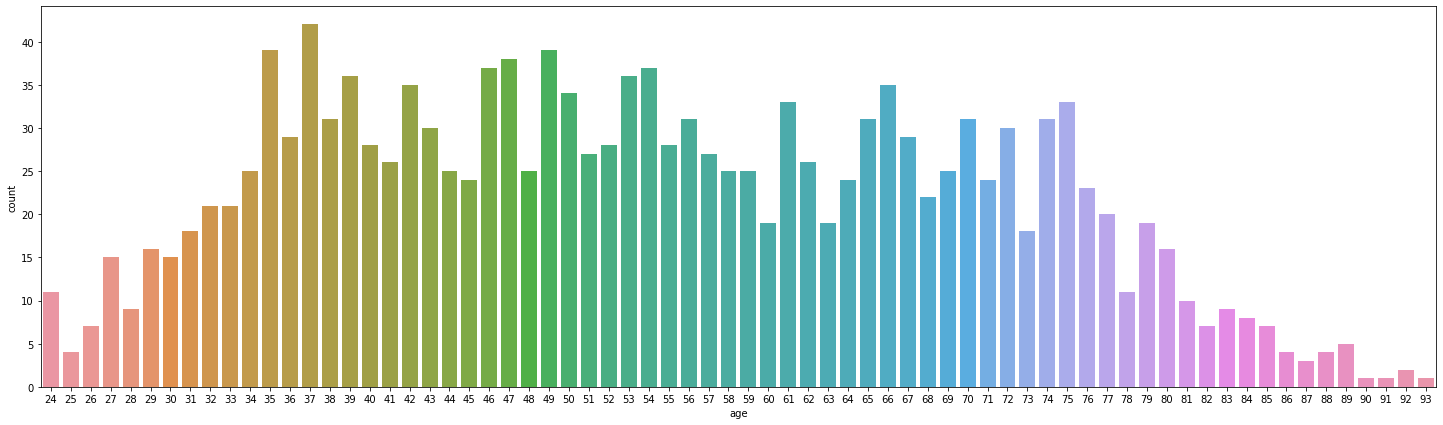

In [15]:
plt.figure(figsize=(25,7))
sns.countplot(x=data_election.age, data=data_election);

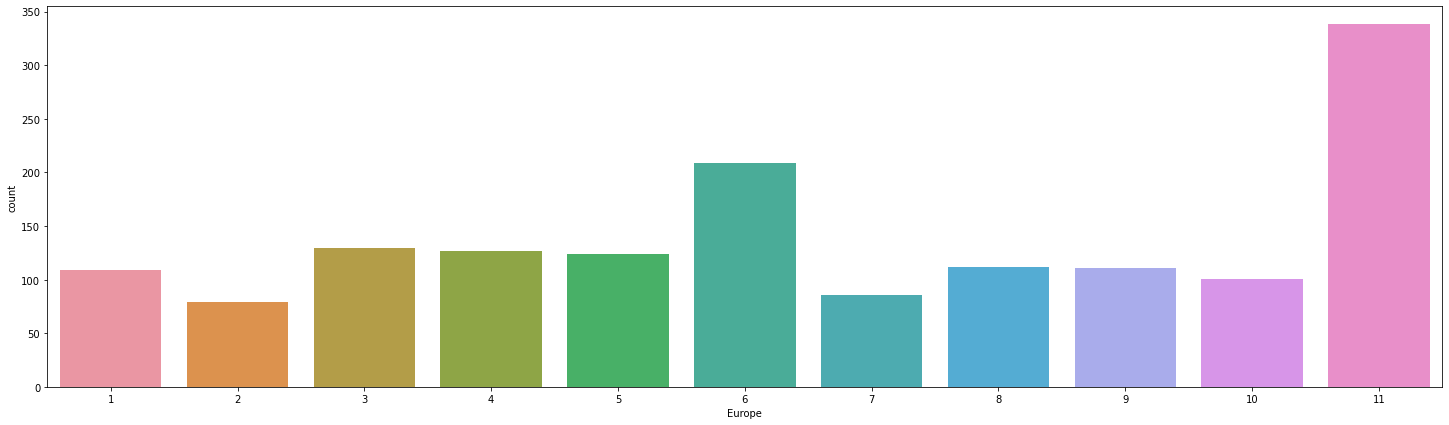

In [16]:
plt.figure(figsize=(25,7))
sns.countplot(x=data_election.Europe, data=data_election);

# Data seems more voters have are Eurosepectic sentiment

# Define Function for Univariate Analysis:

In [17]:
def Univariate_Analysis(column,nbins):
    plt.figure()
    sns.countplot(x=data_election[column],data=data_election)

In [18]:
listnumeric=list(data_election.columns.values)

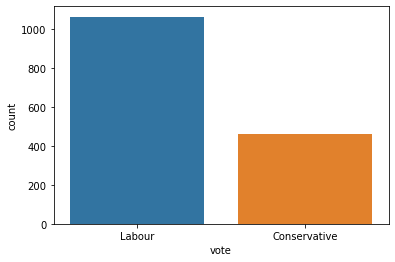

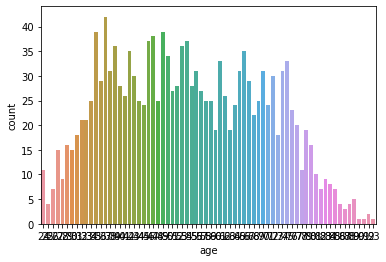

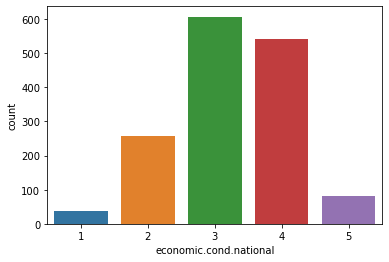

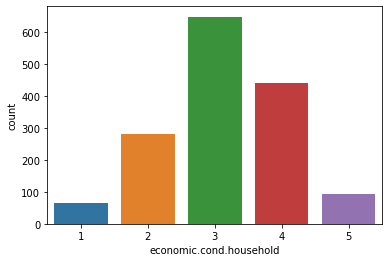

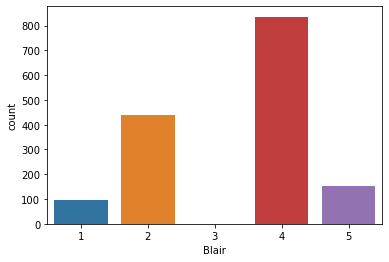

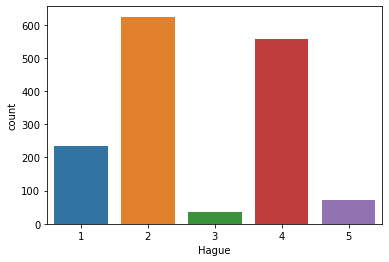

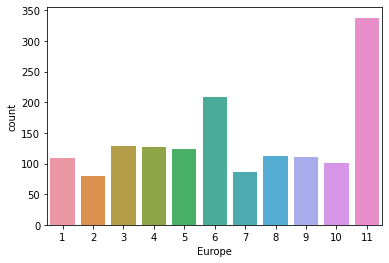

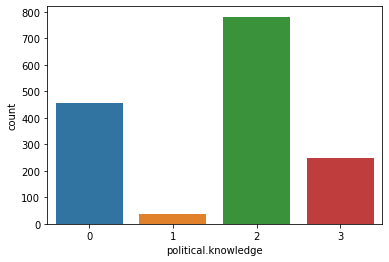

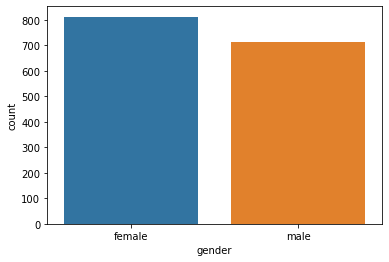

In [19]:
for x in data_election.columns:
    Univariate_Analysis(x,20)

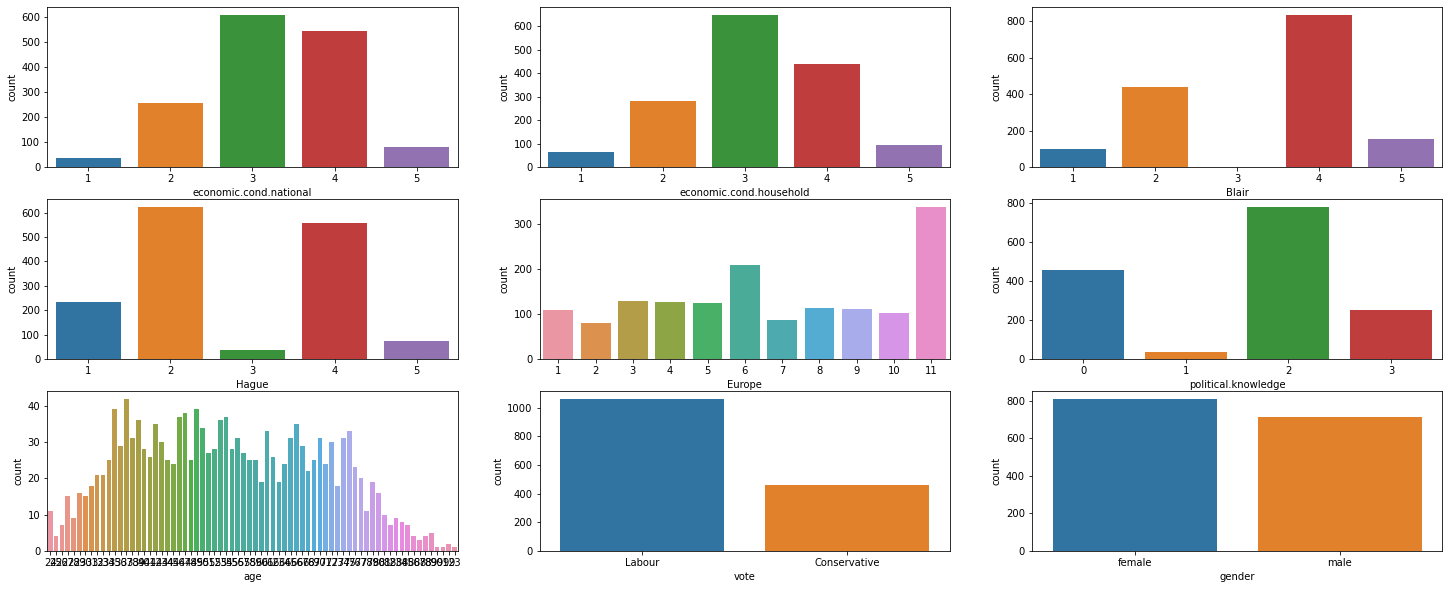

In [20]:
# Lets see all countplot in one frame:
figdims=(25,10)
figs,axs=plt.subplots(nrows=3,ncols=3,figsize=figdims)
sns.countplot(x=data_election['economic.cond.national'], ax=axs[0][0])
sns.countplot(x=data_election['economic.cond.household'], ax=axs[0][1])
sns.countplot(x=data_election.Blair, ax=axs[0][2])
sns.countplot(x=data_election.Hague, ax=axs[1][0])
sns.countplot(x=data_election.Europe, ax=axs[1][1])
sns.countplot(x=data_election['political.knowledge'], ax=axs[1][2])
sns.countplot(x=data_election.age, ax=axs[2][0])
sns.countplot(x=data_election.vote, ax=axs[2][1])
sns.countplot(x=data_election.gender, ax=axs[2][2])
plt.show()

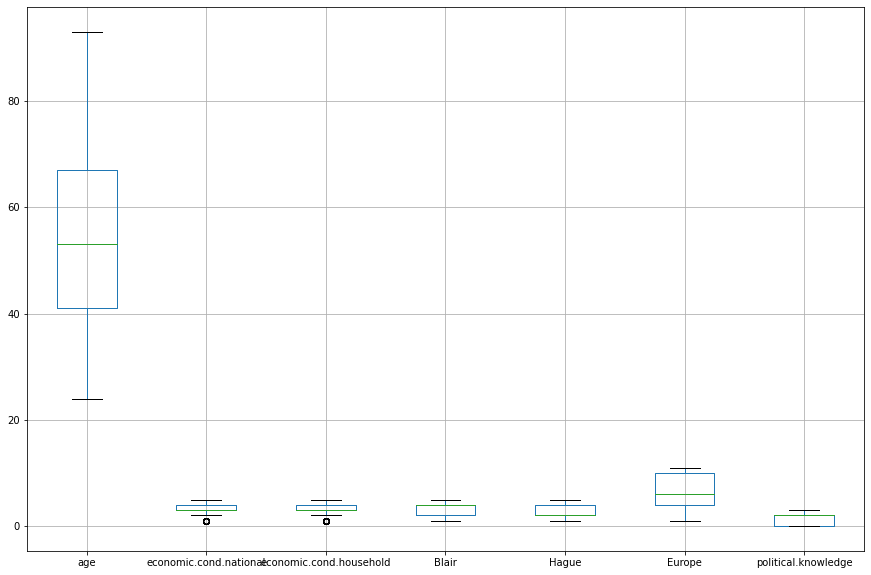

In [21]:
# Check Outliers by Boxplot
plt.figure(figsize=(15,10))
data_election.boxplot();

In [22]:
# there is no need to treat outliers
Q1= data_election.quantile(0.25)
Q3=data_election.quantile(0.75)
IQR=Q3-Q1
lr=(Q1-1.5*IQR)
ur=(Q3+1.5*IQR)

data_election_filtered=data_election[~((data_election<(lr)) | (data_election)>(ur)).any(axis=1)]

C:\Users\Akash Jha\AppData\Local\Temp\ipykernel_18648\1313092644.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_election_filtered=data_election[~((data_election<(lr)) | (data_election)>(ur)).any(axis=1)]


In [23]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

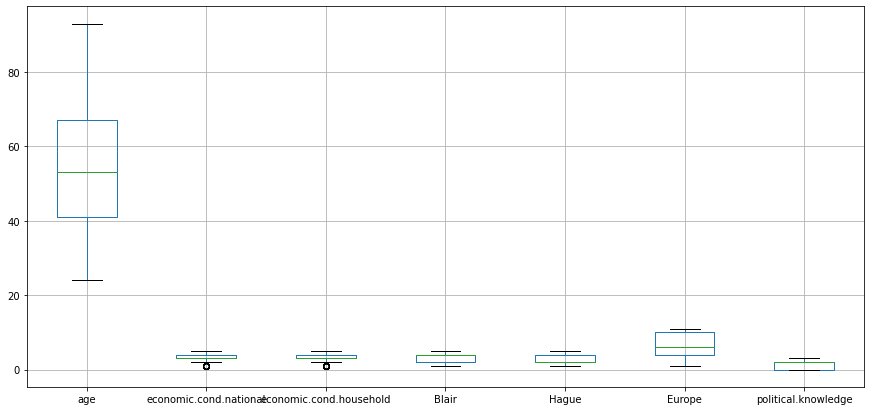

In [24]:
# Check data after Treating Outliers
plt.figure(figsize=(15,7))
data_election_filtered.boxplot();

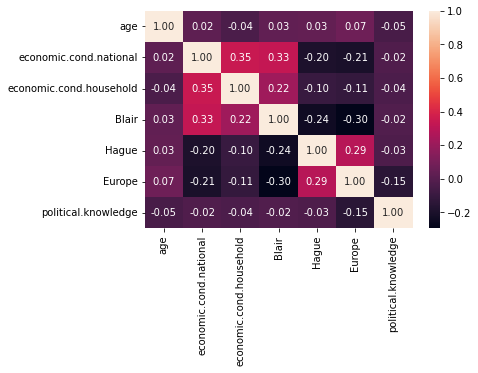

In [25]:
# Bivariate Analysis
sns.heatmap(data_election.corr(),annot=True,fmt='.2f');

- There is not much high coorelation between variables
- Still Economic.condition.national is positively coorelated with Economic condition household and Blair ( Labour Leader)
- Europe is positively coorelated with hague(conservative Learder), i.e. voters who support for European union tends to
  have favourism for Conservative party Leader

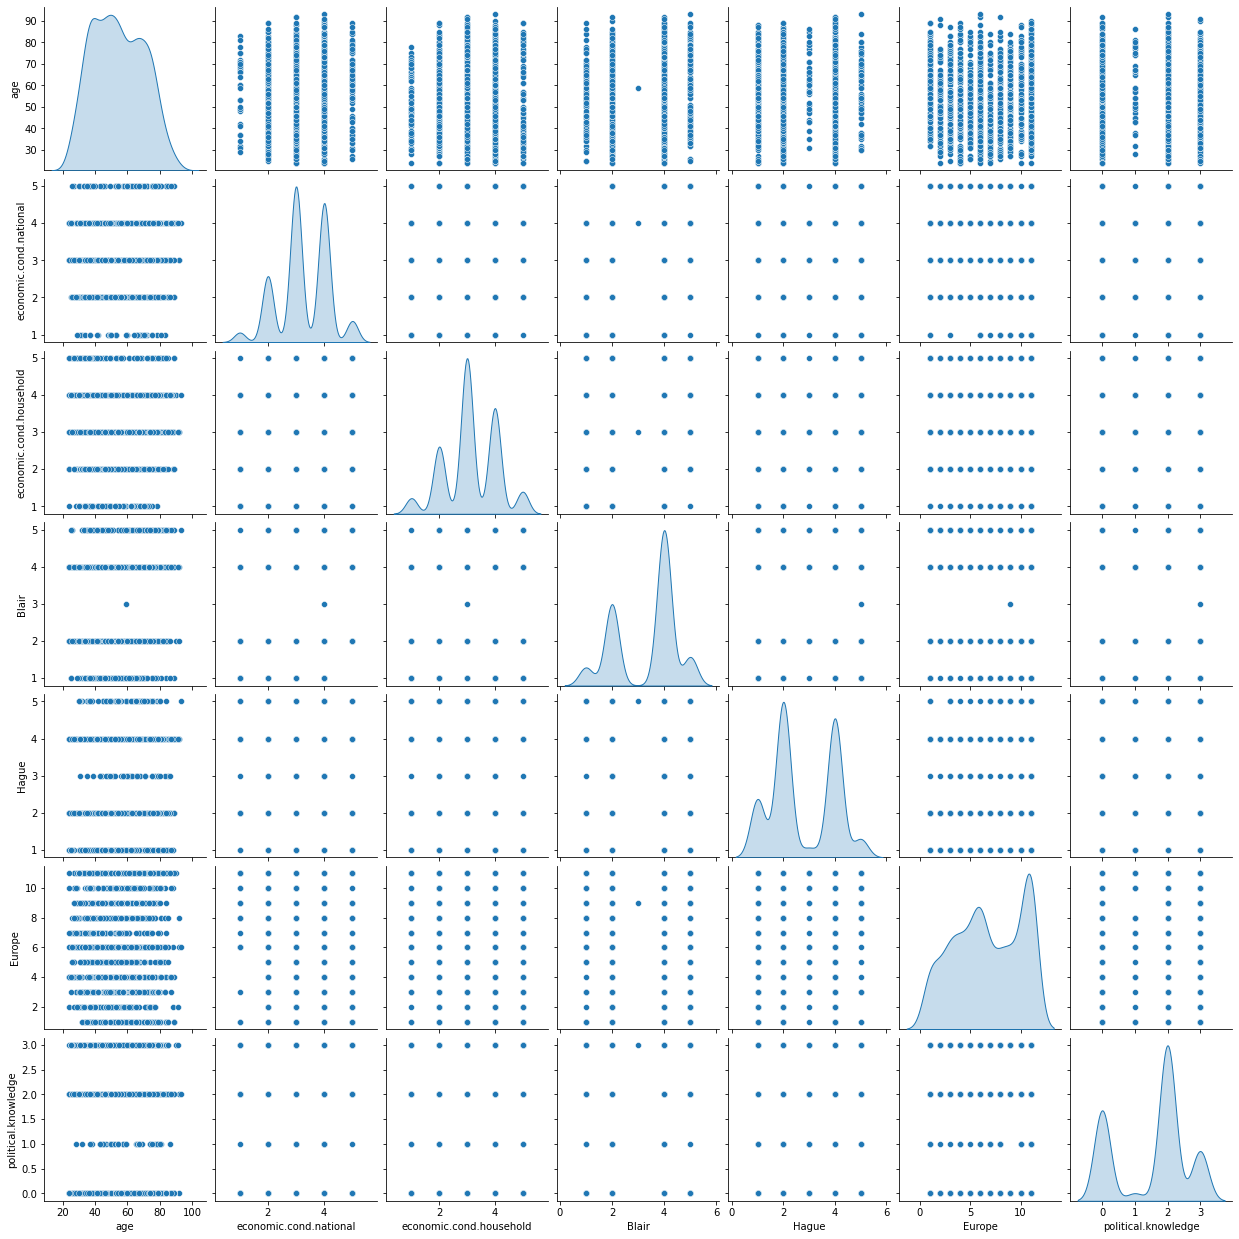

In [26]:
fig=sns.pairplot(data_election,diag_kind='kde')
fig.savefig('pairplot.png')

- As you can observe no independent variable is in normal distribution shape.
- all variables have multiple peaks.
- Other than that you can not tell much about variable coorelation for above scatter plots.

In [27]:
data_election_filtered.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [28]:
data_election_filtered.gender.value_counts()

female    812
male      713
Name: gender, dtype: int64

In [29]:
# Encode Data
data_election_filtered['vote']=np.where(data_election_filtered['vote']=='Labour',0,data_election_filtered['vote'])
data_election_filtered['vote']=np.where(data_election_filtered['vote']=='Conservative',1,data_election_filtered['vote'])

In [30]:
data_election_filtered['gender']=np.where(data_election_filtered['gender']=='female',0,data_election_filtered['gender'])
data_election_filtered['gender']=np.where(data_election_filtered['gender']=='male',1,data_election_filtered['gender'])

In [31]:
# Change data type of Objects to Category
data_election_filtered['vote']=data_election_filtered['vote'].astype('category')
data_election_filtered['gender']=data_election_filtered['gender'].astype('category')

# Apply KNN Model and Naïve Bayes Model. Interpret the results. 

- for KNN and Naive Bayes we dont need to scale data( As Classification is independent from effects of Outliers and extreme values)
- Import important libraries

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

# Spilt Data into  train test (70:30)

- Target Variable is Vote (Dependent)

In [33]:
X=data_election_filtered.drop('vote',axis=1)
y=data_election_filtered['vote']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

# KNN Model

In [35]:
# Apply KNN model
NNH=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [36]:
NNH.fit(X_train,y_train)
print(NNH.score(X_train,y_train))
print(NNH.score(X_test,y_test))

0.9990627928772259
0.7816593886462883


In [37]:
y_predict=NNH.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[279  49]
 [ 51  79]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       328
           1       0.62      0.61      0.61       130

    accuracy                           0.78       458
   macro avg       0.73      0.73      0.73       458
weighted avg       0.78      0.78      0.78       458



In [38]:
from sklearn.metrics import recall_score, precision_score,f1_score


In [39]:
KNN_accuracy_test=NNH.score(X_test,y_test)
KNN_recall_test=recall_score(y_test,y_predict)
KNN_precision_test=precision_score(y_test,y_predict)
KNN_f1_test= f1_score(y_test,y_predict)

- ROC CURVE TEST & TRAIN FOR KNN

In [40]:
from sklearn.metrics import roc_auc_score,roc_curve

In [41]:
probs_knn_train=NNH.predict_proba(X_train)
probs_knn_train=probs_knn_train[:,1]

In [42]:
auc_knn_train=roc_auc_score(y_train,probs_knn_train)
auc_knn_train

0.999997950987624

In [43]:
probs_knn_test=NNH.predict_proba(X_test)
probs_knn_test=probs_knn_test[:,1]

In [44]:
auc_knn_test=roc_auc_score(y_test,probs_knn_test)
auc_knn_test

0.8381566604127579

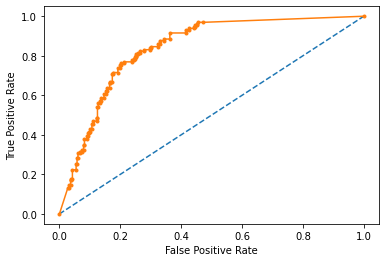

In [45]:
fpr_knn_test,tpr_knn_test,thresholds_knn_test=roc_curve(y_test,probs_knn_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_knn_test,tpr_knn_test,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

- We can see Data is Overfitted , we need to check with Cross validation or relevant method 

# Check Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
from sklearn.utils import shuffle
_X,_Y=shuffle(X,y,random_state=1)

In [48]:
sc=cross_val_score(NNH,_X,_Y,cv=5)

In [49]:
sc.mean()

0.7895081967213116

In [50]:
sc.std()

0.025430451711036445

- so accuracy can be 78.9+-/0.2

# Naive Bayes Model

In [51]:
model=GaussianNB()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

y_predict1=model.predict(X_test)
print(confusion_matrix(y_test,y_predict1))
print(classification_report(y_test,y_predict1))

0.8331771321462043
0.8253275109170306
[[284  44]
 [ 36  94]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.68      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [52]:
NAV_accuracy_test=model.score(X_test,y_test)
NAV_recall_test=recall_score(y_test,y_predict1)
NAV_precision_test=precision_score(y_test,y_predict1)
NAV_f1_test=f1_score(y_test,y_predict1)

- ROC CURVE TEST & TRAIN NAIVE BAYES

In [53]:
probs_nav_train=model.predict_proba(X_train)
probs_nav_train=probs_nav_train[:,1]

In [54]:
auc_nav_train=roc_auc_score(y_train,probs_nav_train)
auc_nav_train

0.8864703712810424

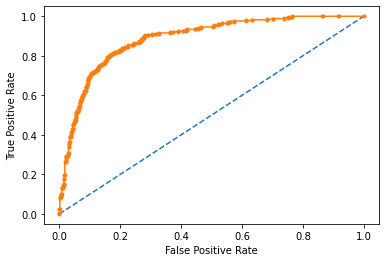

In [55]:
fpr_nav_train,tpr_nav_train,thresholds_nav_train=roc_curve(y_train,probs_nav_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_nav_train,tpr_nav_train,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [56]:
probs_nav_test=model.predict_proba(X_test)
probs_nav_test=probs_nav_test[:,1]
auc_nav_test=roc_auc_score(y_test,probs_nav_test)
auc_nav_test

0.8845450281425891

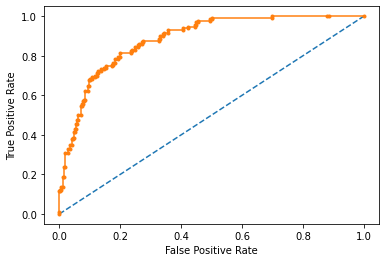

In [57]:
fpr_nav_test,tpr_nav_test,thresholds_nav_test=roc_curve(y_test,probs_nav_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_nav_test,tpr_nav_test,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

- By Naive Bayes method , we are getting good model , overfitting is not something we should worry that much with naive Bayes , Naive Bayes algorithm has tendency to underfit data

In [58]:
from sklearn.ensemble import BaggingClassifier

# Build Decision tree model

In [59]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [60]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [61]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.8256794751640113
0.8056768558951966


In [62]:
print(pd.DataFrame(tree.feature_importances_,columns=['Imp'],index=X_train.columns))

                              Imp
age                      0.000000
economic.cond.national   0.013385
economic.cond.household  0.000000
Blair                    0.158513
Hague                    0.492402
Europe                   0.231168
political.knowledge      0.104532
gender                   0.000000


In [63]:
y_predict5=tree.predict(X_test)
print(confusion_matrix(y_test,y_predict5))
print(classification_report(y_test,y_predict5))

[[297  31]
 [ 58  72]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       328
           1       0.70      0.55      0.62       130

    accuracy                           0.81       458
   macro avg       0.77      0.73      0.74       458
weighted avg       0.80      0.81      0.80       458



In [64]:
tree_accuracy_test=(tree.score(X_test,y_test))
tree_recall_test=recall_score(y_test,y_predict5)
tree_precison_test=precision_score(y_test,y_predict5)
tree_f1_test=f1_score(y_test,y_predict5)

- ROC CURVE TEST AND TRAIN DECISION TREE

In [65]:
probs_tree_test=tree.predict_proba(X_test)
probs_tree_test=probs_tree_test[:,1]

In [66]:
auc_tree_test=roc_auc_score(y_test,probs_tree_test)
auc_tree_test

0.8592753283302064

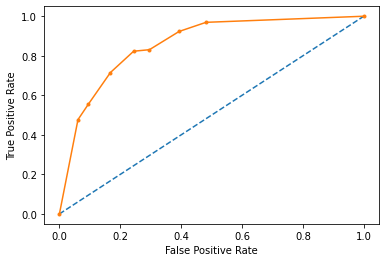

In [67]:
fpr_tree_test,tpr_tree_test,thresholds_tree_test=roc_curve(y_test,probs_tree_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_tree_test,tpr_tree_test,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [68]:
probs_tree_train=tree.predict_proba(X_train)
probs_tree_train=probs_tree_train[:,1]
auc_tree_train=roc_auc_score(y_train,probs_tree_train)
auc_tree_train

0.8654331612162938

- Accuracy is good by Model is not performing in Test 

# Bagging

In [69]:
# Bagging
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(n_estimators=100,random_state=1)
bgcl.fit(X_train,y_train)

BaggingClassifier(n_estimators=100, random_state=1)

# Grid Search

In [70]:
bgclGS=BaggingClassifier(random_state=1)

In [71]:
search_space={'n_estimators':[10,50,100,200],
             'max_samples':[0.5,1.0,1.5,2.0],
             'max_features':[0.5,1.0,1.5,2.0],
             'bootstrap':['True','False']}

In [72]:
from sklearn.model_selection import GridSearchCV
GS= GridSearchCV(estimator=bgclGS,
                param_grid=search_space,
                cv=5,
                verbose=2,
                n_jobs=-1)

In [73]:
GS.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'max_features': [0.5, 1.0, 1.5, 2.0],
                         'max_samples': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [74]:
GS.best_params_

{'bootstrap': 'True',
 'max_features': 1.0,
 'max_samples': 0.5,
 'n_estimators': 100}

In [75]:
print(bgcl.score(X_train,y_train))
print(bgcl.score(X_test,y_test))

0.9990627928772259
0.7991266375545851


In [77]:
y_predict6=bgcl.predict(X_test)
print(confusion_matrix(y_test,y_predict6))
print(classification_report(y_test,y_predict6))

[[283  45]
 [ 47  83]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       328
           1       0.65      0.64      0.64       130

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



In [80]:
Bagging_accuracy_test=bgcl.score(X_test,y_test)
Bagging_recall_test=recall_score(y_test,y_predict6)
Bagging_precision_test=precision_score(y_test,y_predict6)
Bagging_f1_test=f1_score(y_test,y_predict6)

In [81]:
probs_bgcl_train=bgcl.predict_proba(X_train)
probs_bgcl_train=probs_bgcl_train[:,1]

In [82]:
auc_bgcl_train=roc_auc_score(y_train,probs_bgcl_train)
auc_bgcl_train

0.9999938529628719

In [83]:
probs_bgcl_tested=bgcl.predict_proba(X_test)
probs_bgcl_tested=probs_bgcl_tested[:,1]

In [84]:
auc_bgcl_test=roc_auc_score(y_test,probs_bgcl_tested)
auc_bgcl_test

0.8772631332082553

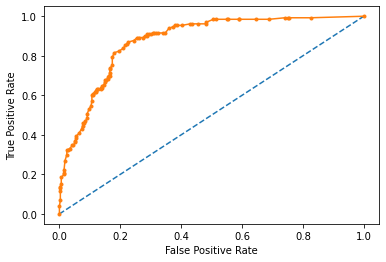

In [85]:
fpr_bgcl_test,tpr_bgcl_test,thresholds_bgcl_test=roc_curve(y_test,probs_bgcl_tested)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_bgcl_test,tpr_bgcl_test,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Boosting model

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
adcl=AdaBoostClassifier(n_estimators=100,random_state=1)
adcl.fit(X_train,y_train)
print(adcl.score(X_train,y_train))
print(adcl.score(X_test,y_test))

0.8472352389878163
0.8187772925764192


In [88]:
print(pd.DataFrame(adcl.feature_importances_,columns=['Imp'],index=X_train.columns))

                          Imp
age                      0.69
economic.cond.national   0.04
economic.cond.household  0.03
Blair                    0.06
Hague                    0.08
Europe                   0.07
political.knowledge      0.02
gender                   0.01


# Grid Search

In [89]:
adclgv=AdaBoostClassifier(random_state=1)

In [90]:
parameters={'n_estimators':[10,50,100,150],
    'learning_rate':[0.001,0.01,0.1,1.0],
    'algorithm':['SAMME', 'SAMME.R']}

In [91]:
GSB=GridSearchCV(estimator=adclgv,
                param_grid=parameters,
                verbose=2,
                cv=5,
                n_jobs=-1)

In [92]:
GSB.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 150]},
             verbose=2)

In [93]:
GSB.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}

In [94]:
y_predict7=adcl.predict(X_test)
print(confusion_matrix(y_test,y_predict7))
print(classification_report(y_test,y_predict7))

[[285  43]
 [ 40  90]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       328
           1       0.68      0.69      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [95]:
AdaBoosting_accuracy_test=adcl.score(X_test,y_test)
AdaBoosting_recall_test=recall_score(y_test,y_predict7)
AdaBoosting_precision_test=precision_score(y_test,y_predict7)
AdaBoosting_f1_test=f1_score(y_test,y_predict7)

- ROC CURVE TEST & TEST FOR ADABOOSTING MODEL

In [96]:
probs_ada_train=adcl.predict_proba(X_train)
probs_ada_train=probs_ada_train[:,1]

In [97]:
auc_ada_train=roc_auc_score(y_train,probs_ada_train)
auc_ada_train

0.9132919432833375

In [98]:
fpr_ada_train,tpr_ada_train,thresholds_ada_train=roc_curve(y_train,probs_ada_train)

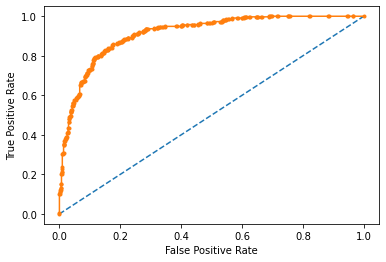

In [99]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_ada_train,tpr_ada_train,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [100]:
probs_ada_test=adcl.predict_proba(X_test)
probs_ada_test=probs_ada_test[:,1]

In [101]:
auc_ada_test=roc_auc_score(y_test,probs_ada_test)
auc_ada_test

0.8791979362101314

In [102]:
fpr_ada_test,tpr_ada_test,thresholds_ada_test=roc_curve(y_test,probs_ada_test)

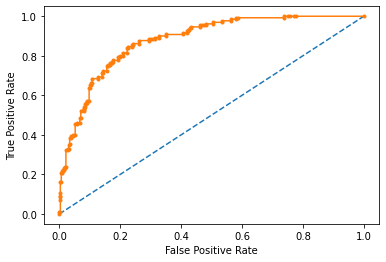

In [103]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_ada_test,tpr_ada_test,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Random Forest Model

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
RF_model=RandomForestClassifier(n_estimators=50,random_state=1,max_features=5)
RF_model.fit(X_train,y_train)
print(RF_model.score(X_train,y_train))
print(RF_model.score(X_test,y_test))
y_predict8=RF_model.predict(X_test)
print(confusion_matrix(y_test,y_predict8))
print(classification_report(y_test,y_predict8))

0.9971883786316776
0.8165938864628821
[[288  40]
 [ 44  86]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.68      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.82       458



In [106]:
print(pd.DataFrame(RF_model.feature_importances_,columns=['Imp'],index=X_train.columns))

                              Imp
age                      0.215123
economic.cond.national   0.073362
economic.cond.household  0.069183
Blair                    0.131790
Hague                    0.201555
Europe                   0.184151
political.knowledge      0.095968
gender                   0.028866


In [107]:
Random_accuracy_test=RF_model.score(X_test,y_test)
Random_recall_test=recall_score(y_test,y_predict8)
Random_precision_test=precision_score(y_test,y_predict8)
Random_f1_test=f1_score(y_test,y_predict8)

In [108]:
from sklearn.metrics import roc_auc_score,roc_curve

- Train ROC CURVE RANDOM FOREST

In [109]:
probs_ran= RF_model.predict_proba(X_train)
probs_ran=probs_ran[:,1]
fpr_ran,tpr_ran,thresholds_ran=roc_curve(y_train,probs_ran)

In [110]:
auc_ran=roc_auc_score(y_train,probs_ran)
auc_ran

0.999940578641095

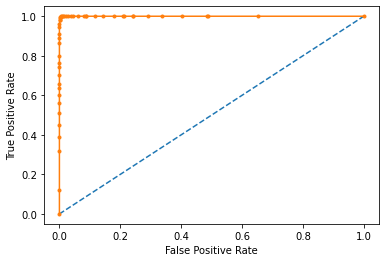

In [111]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_ran,tpr_ran,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

- Test Roc curve for random Forest

In [112]:
probs_ran_test=RF_model.predict_proba(X_test)

In [113]:
probs_ran_test=probs_ran_test[:,1]
fpr_ran_test,tpr_ran_test,thresholds_ran_test=roc_curve(y_test,probs_ran_test)

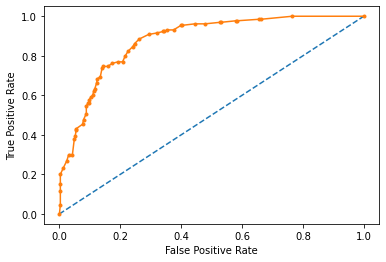

In [114]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_ran_test,tpr_ran_test,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Comparing all models test roc curve

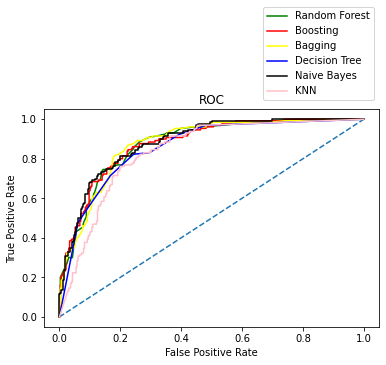

In [115]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_ran_test, tpr_ran_test,color='green', label='Random Forest')
plt.plot(fpr_ada_test,tpr_ada_test,color='red', label='Boosting')
plt.plot(fpr_bgcl_test,tpr_bgcl_test,color='yellow', label='Bagging')
plt.plot(fpr_tree_test,tpr_tree_test,color='blue', label='Decision Tree')
plt.plot(fpr_nav_test,tpr_nav_test,color='black', label='Naive Bayes')
plt.plot(fpr_knn_test,tpr_knn_test,color='pink', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102),loc='lower right')
plt.show()

# for logistics and LDA we need to do Scaling

In [116]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [117]:
scaler.fit(X_train)

StandardScaler()

In [118]:
X_train1=scaler.transform(X_train)
X_test1=scaler.transform(X_test)

# LDA MODEL

In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis()

In [120]:
LDA.fit(X_train1,y_train)

LinearDiscriminantAnalysis()

In [121]:
print(LDA.score(X_train1,y_train))

0.8369259606373008


In [122]:
y_predict9=LDA.predict(X_test1)
print(confusion_matrix(y_test,y_predict9))
print(classification_report(y_test,y_predict9))

[[289  39]
 [ 44  86]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [123]:
LDA_accuracy_test=LDA.score(X_test1,y_test)
LDA_recall_test=recall_score(y_test,y_predict9)
LDA_precision_test=precision_score(y_test,y_predict9)
LDA_f1_test=f1_score(y_test,y_predict9)

# LOGISTIC REGRESSION

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
log_res=LogisticRegression()

In [126]:
log_res.fit(X_train1,y_train)

LogisticRegression()

In [127]:
y_predict10=log_res.predict(X_test1)
print(log_res.score(X_train1,y_train))
print(log_res.score(X_test1,y_test))
print(confusion_matrix(y_predict10,y_test))
print(classification_report(y_predict10,y_test))

0.8397375820056232
0.8231441048034934
[[292  45]
 [ 36  85]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       337
           1       0.65      0.70      0.68       121

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.83      0.82      0.83       458



In [128]:
LOG_accuracy_test=log_res.score(X_test1,y_test)
LOG_recall_test=recall_score(y_predict10,y_test)
LOG_precision_test=precision_score(y_predict10,y_test)
LOG_f1_test=f1_score(y_predict10,y_test)

# SMOTE

In [129]:
from imblearn.over_sampling import SMOTE

In [130]:
sm=SMOTE(random_state=1)

In [131]:
# Oversampling smote is only applied on train dataset
X_train_res,Y_train_res=sm.fit_resample(X_train,y_train.ravel())

In [132]:
Y_train_res.shape

(1470,)

# Naive Bayes with SMOTE

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [134]:
NB_SM_Model=GaussianNB()
NB_SM_Model.fit(X_train_res,Y_train_res)

GaussianNB()

# Train

In [135]:
print(NB_SM_Model.score(X_train_res,Y_train_res))
y_train_res_predict=NB_SM_Model.predict(X_train_res)
print(confusion_matrix(Y_train_res,y_train_res_predict))
print(classification_report(Y_train_res,y_train_res_predict))

0.8326530612244898
[[614 121]
 [125 610]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       735
           1       0.83      0.83      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



# Test

In [136]:
print(NB_SM_Model.score(X_test,y_test))
y_res_predict=NB_SM_Model.predict(X_test)
print(confusion_matrix(y_test,y_res_predict))
print(classification_report(y_test,y_res_predict))

0.7925764192139738
[[261  67]
 [ 28 102]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       328
           1       0.60      0.78      0.68       130

    accuracy                           0.79       458
   macro avg       0.75      0.79      0.76       458
weighted avg       0.82      0.79      0.80       458



# KNN Model with SMOTE

In [137]:
NNH_SM_Model=KNeighborsClassifier()
NNH_SM_Model.fit(X_train_res,Y_train_res)

KNeighborsClassifier()

# Train Data set

In [138]:
print(NNH_SM_Model.score(X_train_res,Y_train_res))
y_train_res_predict1=NNH_SM_Model.predict(X_train_res)
print(confusion_matrix(Y_train_res,y_train_res_predict1))
print(classification_report(Y_train_res,y_train_res_predict1))

0.8836734693877552
[[605 130]
 [ 41 694]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       735
           1       0.84      0.94      0.89       735

    accuracy                           0.88      1470
   macro avg       0.89      0.88      0.88      1470
weighted avg       0.89      0.88      0.88      1470



# Test Data Set

In [139]:
print(NNH_SM_Model.score(X_test,y_test))
y_res_predict1=NNH_SM_Model.predict(X_test)
print(confusion_matrix(y_test,y_res_predict1))
print(classification_report(y_test,y_res_predict1))


0.7554585152838428
[[246  82]
 [ 30 100]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       328
           1       0.55      0.77      0.64       130

    accuracy                           0.76       458
   macro avg       0.72      0.76      0.73       458
weighted avg       0.79      0.76      0.77       458



# By Looking the Smote and normal, Naive bayes model is much better compare to all other models. and as this is exit pole of election we can use method based on probabilities , result accuracy is much better.

In [140]:
from collections import Counter
counter=Counter(Y_train_res)
counter

Counter({0: 735, 1: 735})

In [141]:
counters=Counter(y_train)
counters

Counter({0: 735, 1: 332})

# Random Forest with SMote

In [142]:
rdfl_res=RandomForestClassifier(n_estimators=50,random_state=1)
rdfl_res.fit(X_train_res,Y_train_res)

RandomForestClassifier(n_estimators=50, random_state=1)

In [143]:
print(rdfl_res.score(X_train_res,Y_train_res))
y_train_res_predict2=rdfl_res.predict(X_train_res)
print(confusion_matrix(Y_train_res,y_train_res_predict2))
print(classification_report(Y_train_res,y_train_res_predict2))

0.9972789115646259
[[734   1]
 [  3 732]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [144]:
print(rdfl_res.score(X_test,y_test))
y_train_res_predict3=rdfl_res.predict(X_test)
print(confusion_matrix(y_test,y_train_res_predict3))
print(classification_report(y_test,y_train_res_predict3))

0.8165938864628821
[[274  54]
 [ 30 100]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       328
           1       0.65      0.77      0.70       130

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.82      0.82       458



# Generate Tabular form for accuracy , precision, recall & F1 SCore for all Models

- Table for test model

In [145]:
metric=np.array([[KNN_recall_test,KNN_precision_test,KNN_f1_test],
                 [NAV_recall_test,NAV_precision_test,NAV_f1_test],
                 [tree_recall_test,tree_precison_test,tree_f1_test],
                 [Bagging_recall_test,Bagging_precision_test,Bagging_f1_test],
                 [AdaBoosting_recall_test,AdaBoosting_precision_test,AdaBoosting_f1_test],
                 [Random_recall_test,Random_precision_test,Random_f1_test],
                 [LDA_recall_test,LDA_precision_test,LDA_f1_test],
                 [LOG_recall_test,LOG_precision_test,LOG_f1_test]       
                ]).T

In [146]:
result=pd.DataFrame({'Model':['KNN Model','Naive_bayes','Decision_tree','Bagging','AdaBoosting','Random_Forest','LDA','Logistics_Regression'],
                    'Accuracy':[KNN_accuracy_test,NAV_accuracy_test,tree_accuracy_test,Bagging_accuracy_test,AdaBoosting_accuracy_test,Random_accuracy_test,LDA_accuracy_test,LOG_accuracy_test],
                    'Recall':metric[0],
                    'Precision':metric[1],
                    'F1_Score':metric[2]})

In [147]:
result

,Model,Accuracy,Recall,Precision,F1_Score
0,KNN Model,0.781659,0.607692,0.617188,0.612403
1,Naive_bayes,0.825328,0.723077,0.681159,0.701493
2,Decision_tree,0.805677,0.553846,0.699029,0.618026
3,Bagging,0.799127,0.638462,0.648438,0.643411
4,AdaBoosting,0.818777,0.692308,0.676692,0.684411
5,Random_Forest,0.816594,0.661538,0.682540,0.671875
6,LDA,0.818777,0.661538,0.688000,0.674510
7,Logistics_Regression,0.823144,0.702479,0.653846,0.677291


In [148]:
from sklearn import model_selection

In [156]:
models = []
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
 cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

Ada Boost: 0.828836 (0.021520)
Random Forest: 0.825585 (0.024129)
KNN: 0.794092 (0.030513)
CART: 0.769788 (0.034508)
Naive Bayes: 0.830181 (0.023541)


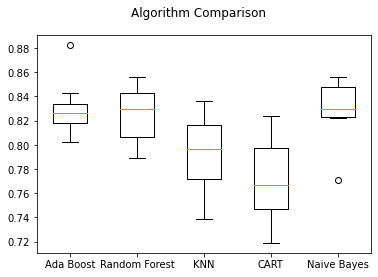

In [157]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [162]:
models=[]
models.append(('KNN', KNeighborsClassifier()))
models.append(('AdaBoosting', AdaBoostClassifier()))
models.append(('Naive BAyes', GaussianNB()))
models.append(('CArt', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

seed=7
results=[]
names=[]
scoring='accuracy'

for name,model in models:
    kfold=model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= '%s: %f (%f)' %(name,cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.794092 (0.030513)
AdaBoosting: 0.828836 (0.021520)
Naive BAyes: 0.830181 (0.023541)
CArt: 0.763872 (0.034592)
Random Forest: 0.830809 (0.027991)
